In [1]:
from IPython.display import IFrame, Image, HTML, display, YouTubeVideo

# We're gonna do some crazy plotting...
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns  # Makes for nicer plots
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4
from matplotlib.patches import Ellipse, Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d import proj3d
from ipywidgets import interact, interactive, fixed

# Spatial Weights and Correlations

*Space-Time Analytics — Lecture 3*

* **Prof. Carson J. Q. Farmer**  
    <i class="fa-fw fa fa-twitter"></i> [@carsonfarmer](https://twitter.com/carsonfarmer)  
    <i class="fa-fw fa fa-globe"></i> [carsonfarmer.com](https://carsonfarmer.com)  
    <i class="fa-fw fa fa-envelope-o"></i> [carson.farmer@colorado.edu](mailto:carson.farmer@colorado.edu)  
    <i class="fa-fw fa fa-github-alt"></i> [github.com/carsonfarmer](https://github.com/carsonfarmer)  
    <i class="fa-fw fa fa-briefcase"></i> Guggenheim Building Room 207  
    <i class="fa-fw fa fa-clock-o"></i> Wednesdays 2:00-3:00 PM and 4:15-5:15 PM  

## Today

* This week's student presentations  
    <i class="fa-fw fa fa-search"></i> [Exploratory Analysis](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.648.9094&rep=rep1&type=pdf)  
    <i class="fa-fw fa fa-question"></i> Ask questions!  
* Learning stuff...  
    <i class="fa-fw fa fa-clock-o"></i> Quick review of *spatial dependence*  
    <i class="fa-fw fa fa-globe"></i> Extending dependence to **3** *dimensions*  
* Some thoughts on 'near' or 'close' in space *and* time

## Student Presentation

[**Space-Time Clustering**](http://onlinelibrary.wiley.com/doi/10.1002/joc.2280/abstract;jsessionid=2F2A893692F88E48DC5A0090A1EE9CED.f03t01)

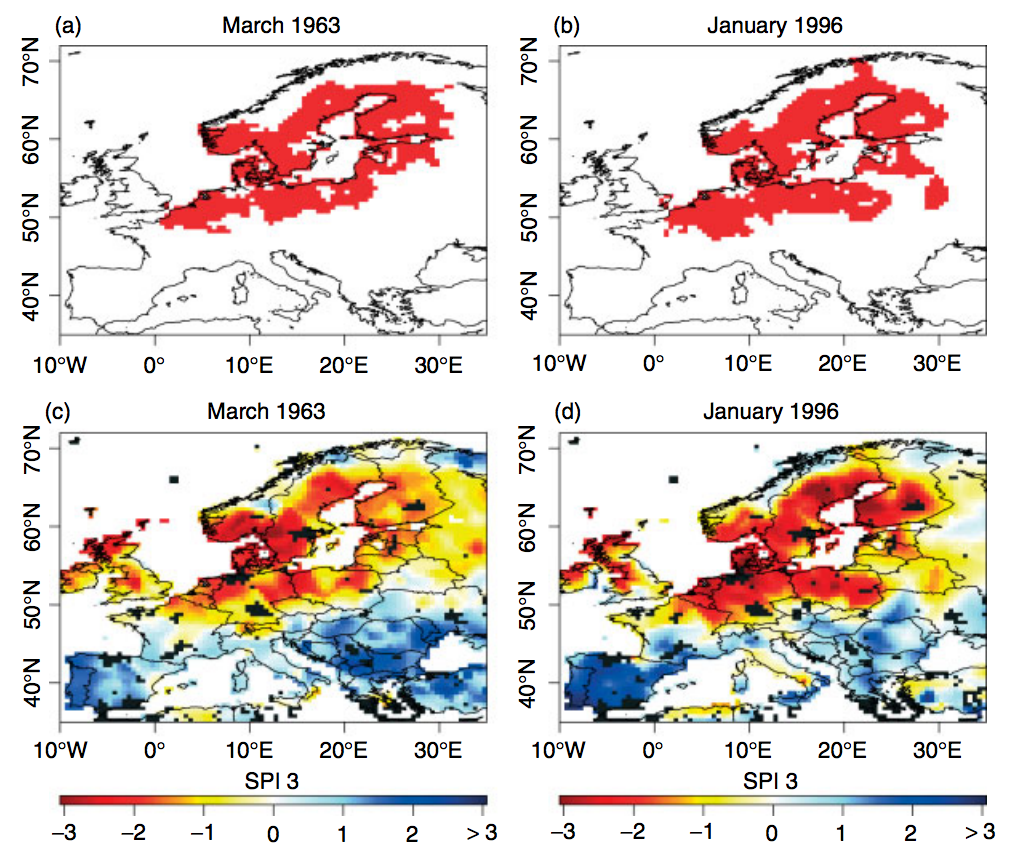

In [8]:
display(Image("./images/presentation2.png", width=500, embed=True))

## Last time, on Space-Time Analytics...

* Spatial Data
* Weights
* Spatial-Autocorrelation
* Moran's I
* A little bit about Variograms
* Concepts of nearness in space and time...

## Finally Looking at Space & Time

* Exploratory Spatial and Temporal Data Analysis
    * Space-Time Interaction Tests
        * Knox Test
        * Modified Knox Test
        * Mantel Test
        * Jacquez Test
        
</div>
<div class="alert alert-info", style="font-size: 0.8em;">
\* [Chapter 9 from the CrimeStat III User Workbook](https://www.icpsr.umich.edu/CrimeStat/files/CrimeStatChapter.9.pdf) has surprisingly good coverage of many of these tests/topics.
</div>


## Space-Time Interaction

* We've looked at Spatial/Temporal Autocorrelation
    * Tells us about self-similarity in space and in time
* Based on concept of nearness and some measure of similarity
    * Later we'll talk about self-similarity in space time...
* But first, what about just closeness in space-time?

## Types of Interactions

* Different *types* of interaction could occur between space and time
* Four distinctions can be made:
    1. *Spatial Clustering* all the time
    2. *Spatial Clustering* within a *specific time period*
    3. *Space-Time Clustering*
    4. *Space-Time Interaction*

## Examples

**Spatial Clustering**: Robberies often are concentrated in particular locations as are vehicle thefts
* Spatial Hot-Spots
* No space-time *interaction* since clustering occurs all the time

## Examples

**Spatial-Clustering in Time**: Motor vehicle crashes tend to occur more frequently in late afternoon and early evening
* A by-product of congestion on the roads?
* Hot spots could occur during certain time periods

## Examples

**Space-Time Clustering**: A car thief *gang* decides to attack a particular neighborhood. After binge of car thefts, they move on to another neighborhood
* Events occur within *short* time period within *concentrated* area
* Cluster moves from one location to another

## Examples

**Space-Time Interaction**: Vehicle thefts may shift towards seaside communities during summer months when more vacationers around
* Relationship between space and time in more complex
* Diffusions processes also fit this description

## Important distinction

Many of the space-time tests that exist only measure gross space-time interaction, rather than space-time clustering

* Examples?

## Space-Time Interaction Tests

* Series of tests designed to detect **clustering** within space-time event patterns
* Developed over many years of iterations
    * Primarily centered around disease clustering
* Idea is to find patterns that are composed of unique *events*
    * Events having spatial and temporal coordinates

<!--</div>
<div class="alert alert-info", style="font-size: 0.8em;">
\* Arguably initiated by [Knox and Bartlett (1964). The detection of space-time interactions. Journal of the Royal Statistical Society. Series C (Applied Statistics), 13(1):25–30](http://www.jstor.org/stable/2985220).
</div>-->

* Tests designed to detect clustering of events in *both space and time*...
    > ...**beyond** any purely spatial or purely temporal clustering
* In other words, determine if events are "interacting"
    * Essentially, test if pairs of events closest to each other in *space* are also closest in *time*

## The CSTR Null Hypothesis

* Complete Spatial and Temporal Randomness!
* Events are distributed randomly in space and time
    * Distance between *pairs of events* in space is independent of the distance in time
* In `PySAL`, we can perform some of these tests using the `interaction` module:

In [11]:
import pysal as ps
import pysal.spatial_dynamics.interaction as interaction

</div>
<div class="alert alert-info", style="font-size: 0.8em;">
A good reference for this stuff is Tango, T. (2010). *Statistical methods for disease clustering*. Springer Science & Business Media.
</div>

## Knox Test

* Pair data points and evaluate whether pairs are found close in *space and time*
* Stat determines if number of close pairs sufficiently deviates from...
    * Expected number of close space-time pairs due to a random process
    * Based on cross-products of columns and row totals
* Knox (1964) suggests the construction of a $2\times2$ contingency table:

| Space vs Time | Close                 | Not Close            |
|---------------|-----------------------|----------------------|
| **Close**     | Close ($0_{11}$)      | Time Only ($0_{12}$) |
| **Not Close** | Space Only ($0_{21}$) | Not Close ($0_{22}$) |

## Formal Test

$$
X=\sum_{i}^{n}\sum_{j}^{n}a_{ij}^{s}a_{ij}^{t}
$$

$$
\begin{align} \nonumber
 a_{ij}^{s} &=
 \begin{cases}
 1, & \text{if $d^s_{ij}<\delta$}\\
 0, & \text{otherwise}
\end{cases}
\end{align}
$$
  
$$
\begin{align} \nonumber
a_{ij}^{t} &=
\begin{cases}
1, & \text{if $d^t_{ij}<\tau$}\\
0, & \text{otherwise}
\end{cases}
\end{align}
$$

Where $n$ = number of events, $a^{s}$ = adjacency in space, $a^{t}$ = adjacency in time, $d^{s}$ = distance in space, and $d^{t}$ = distance in time.  
Critical space and time distance thresholds are defined as $\delta$ and $\tau$, respectively. 

## Significance

* Unlike the original test, we usually use Monte Carlo permutation methods to assess significance
    * Event timestamps are permuted and statistic is recalculated
    * Repeat many times to generate distribution
        * Distribution is used to establish pseudo-significance of observed test statistic

## How About an Example?

Data come from a study of Burkitt’s Lymphoma in Uganda during the period 1961-75 \*:

In [12]:
path = ps.examples.get_path("burkitt.shp")
burkitt = ps.pdio.read_files(path)  # Data frame
# Special Space-Time Event object from Shapefile...
events = interaction.SpaceTimeEvents(path,'T')

</div>
<div class="alert alert-info", style="font-size: 0.8em;">
\* [Kulldorff, M. and Hjalmars, U. (1999). The Knox method and other tests for space- time interaction. Biometrics, 55(2):544–552](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.525.4226&rep=rep1&type=pdf).
</div>

## Where in Space?

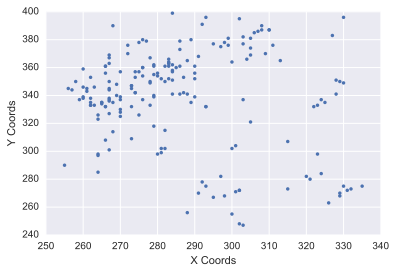

In [21]:
ax = plt.figure(figsize=(6, 4)).gca()
ax.plot(events.space[:, 0], events.space[:, 1], ".")
ax.set_xlabel("X Coords")
ax.set_ylabel("Y Coords")
plt.show()

## Where in Time?

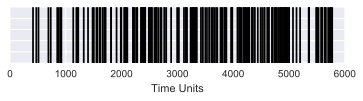

In [28]:
ax = plt.figure(figsize=(6, 1)).gca()
ax.vlines(events.t[:, 0], 0, 1)
ax.set_xlabel("Time Units")
plt.tick_params(axis='y', which='both', labelleft='off') 
plt.show()

## Where in Space-Time?

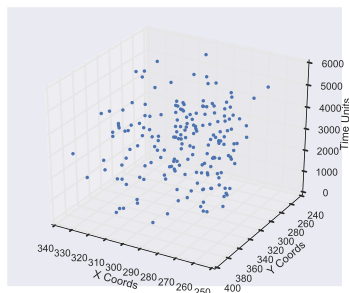

In [34]:
@interact(angle=(0, 240, 5))  # That's all it takes to make it interactive :)
def make_plot(angle):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.gca(projection='3d')
    ax.view_init(30, angle)  # Use 'angle' parameter
    ax.set_ylabel("Y Coords")
    ax.set_xlabel("X Coords")
    ax.set_zlabel("Time Units")
    ax.plot(events.space[:,0], events.space[:,1], events.t[:,0], ".")
    plt.show()

## Is it Clustered?

* Run Knox test with distance and time thresholds of 20 and 5
    * Counts events that are closer than 20 units in space, and 5 units in time
    * We use 99 permutations here, but could be something else...

In [44]:
result = interaction.knox(events.space, events.t, delta=20, tau=5, permutations=99)
result

{'pvalue': array([ 0.19]), 'stat': 13}

* Reports {{result["stat"]}} events close in both space and time
    * Based on our threshold definitions
    * p-value >> 0.05 based on 99 permutations

## Modified Knox Test

* Knox Index is a *simple* measure of space-time clustering
    * Differences between observed and expected frequencies could occur in *any* cell or combination of cells
* Finding a significant relationship does not automatically mean that events that were close in distance were also close in time\*

</div>
<div class="alert alert-info", style="font-size: 0.8em;">
\* [R.D. Baker. (2004). Identifying space-time disease clusters. Acta Tropica, 91(3):291-299.](http://www.sciencedirect.com/science/article/pii/S0001706X04001044).
</div>

## Some Maths

$$
T=\frac{1}{2}\bigg(\sum_{i=1}^{n}\sum_{j=1}^{n}f_{ij}g_{ij} - \frac{1}{n-1}\sum_{k=1}^{n}\sum_{l=1}^{n}\sum_{j=1}^{n}f_{kj}g_{lj}\bigg)
$$

Where $n$ = number of events, $f$ = adjacency in space, $g$ = adjacency in time (calculated in a manner equivalent to $a^{s}$ and $a^{t}$ above in the Knox test). The first part of this statistic is equivalent to the original Knox test, while the second part is the expected value under spatio-temporal randomness. 

## Is it Still Clustered?

* Perform modified Knox test with distance and time thresholds of 20 and 5
    * Counts events that are closer than 20 units in space, and 5 units in time
    * Again we'll use 99 permutations

In [37]:
result = interaction.modified_knox(events.space, events.t, delta=20, tau=5, permutations=99)
result

{'pvalue': 0.20999999999999999, 'stat': 2.1336898395721917}

* This reports a statistic value of {{"{:.4}".format(result["stat"])}} and a p-value >> 0.05.
* So once again, we don't reject our null hypothesis... which is what?

## Mantel Test

* The [Mantel Index](http://cancerres.aacrjournals.org/content/27/2_Part_1/209) resolves some of the problems of the Knox Index
* Computed as correlation between distance and time interval for pairs of incidents
* In other words:
    * Mantel test *keeps* distance information discarded by Knox test
    * *Unstandardized* Mantel statistic is calculated by summing product of spatial and temporal distances between all event pairs:

## Unstandardized Mantel Test

$$
Z=\sum_{i}^{n}\sum_{j}^{n}(d_{ij}^{s}+c)^{p}(d_{ij}^{t}+c)^{p}
$$

Where, again, $d^{s}$ and $d^{t}$ denote distance in space and time. The constant, $c$, and the power, $p$, usually default to 0 and 1.

</div>
<div class="alert alert-info", style="font-size: 0.8em;">
Mantel proposed adding a constant to the distance measurements and a reciprocal transform of the resulting distance measurement to lessen the effect of the larger distances on the product sum.
</div>

## Standardized Version

$$
r=\frac{1}{n^2-n-1}\sum_{i}^{n}\sum_{j}^{n}\Bigg[\frac{d_{ij}^{s}-\bar{d^{s}}}{\sigma_{d^{s}}}\Bigg] \Bigg[\frac{d_{ij}^{t}-\bar{d^{t}}}{\sigma_{d^{t}}}\Bigg]
$$

Where $\bar{d^{s}}$ refers to the average distance in space, and $\bar{d^{t}}$ the average distance in time. For notational convenience $\sigma_{d^{t}}$ and $\sigma_{d^{t}}$ refer to the sample (not population) standard deviations, for distance in space and time, respectively.

</div>
<div class="alert alert-info", style="font-size: 0.8em;">
The same constant and power transformations may also be applied to the spatial and temporal distance matrices employed by the standardized Mantel.
</div>

## Is it *Still* Clustered?

* Perform Mantel Test using default parameters
    * Again we'll use 99 permutations

In [48]:
result = interaction.mantel(events.space, events.t, permutations=99, scon=0.0, spow=1.0, tcon=0.0, tpow=1.0)
result

/Users/carsonfarmer/miniconda3/envs/space-time/lib/python3.5/site-packages/numpy/core/fromnumeric.py:48: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = getattr(asarray(obj), method)(*args, **kwds)


{'pvalue': 0.54000000000000004, 'stat': -0.0016876208960724644}

* Once again, we fail to reject the null hypothesis based on our test statistic of {{"{:.4}".format(result["stat"])}} and a p-value >> 0.05.

## Limitations?

* It is a Pearson-type correlation coefficient
    * Extreme values of either space or time could distort the relationship
* Sample size needs to be fairly large to produce a stable estimate
    * As with any correlation coefficient
* Because statistic is a comparison of *all* pairs of observations, the correlations tend to be small
    * Which makes interpretation hard...

## Jacquez Test

* What if we don't know what distances to use?
    * Maybe $\delta$ and/or $\tau$ are hard to specify?
    * Maybe distances aren't quite what we need to explain interactions?
* Instead of using a set distance in space and time to determine proximity...
    * Jacquez test employs a nearest neighbor distance approach
    * Think back to our 'weights' discussion...

## That's Useful...

* Allows test to account for changes in underlying population density
* Statistic is calculated as...
    * The number of event pairs that are within the set of k nearest neighbors for each other in both space and time
* As always, significance of this count is established using a Monte Carlo permutation method

## Formal Definition

$$
J_{k}=\sum_{i=1}^{n} \sum_{j=1}^{n} a_{ijk}^{s}a_{ijk}^{t}
$$

$$
\begin{align} \nonumber
a_{ijk}^{s} = 
\begin{cases}
1, & \textrm{if event } j \textrm{ is a } k \textrm{ nearest neighbor of event } i \textrm{ in space}\\
0, & \text{otherwise}
\end{cases} 
\end{align}
$$

$$
\begin{align} \nonumber
a_{ijk}^{t} = 
\begin{cases}
1, & \textrm{if event } j \textrm{ is a } k \textrm{ nearest neighbor of event } i \textrm{ in space}\\
0, & \text{otherwise}
\end{cases}
\end{align}
$$

Where $n$ = number of cases; $a^{s}$ = adjacency in space; $a^{t}$ = adjacency in time.

## But is it *Still* Clustered?

* Perform Jacquez test on example dataset with k = 3

In [51]:
result = interaction.jacquez(events.space, events.t ,k=3,permutations=99)
result

{'pvalue': 0.52000000000000002, 'stat': 9}

* In this case, there are {{result["stat"]}} instances where events are nearest neighbors in both space and time
* Significance is again assessed by Monte Carlo methods
    * Again there is not enough evidence to reject the null hypothesis of *no space-time interaction*

![That's all folks](http://media3.giphy.com/media/jYAGkoghdmD9S/giphy.gif)